<a href="https://colab.research.google.com/github/Lordrizal/portofolio/blob/dev/M5_ml_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Ahmad Rizal Bayhaqi
NRP: 2043201047
Kelas: C

# ML Cancer Classification

## Library

In [3]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


## Preprocessing

### Load Data

In [4]:
# Load dataset
dir = "/content/drive/MyDrive/Colab Notebooks/ml_storage/Sem7_ML/cancer.csv"
df = pd.read_csv(dir, encoding='latin1')#unicode_escape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [6]:
df = df.drop(['id','Unnamed: 32'],axis=1)


### Check Missing Value

In [7]:
round(df.isnull().sum()/df.shape[0]*100, 2)

diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: float64

#### Check Distribution

In [8]:
list (df.columns[1:])

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

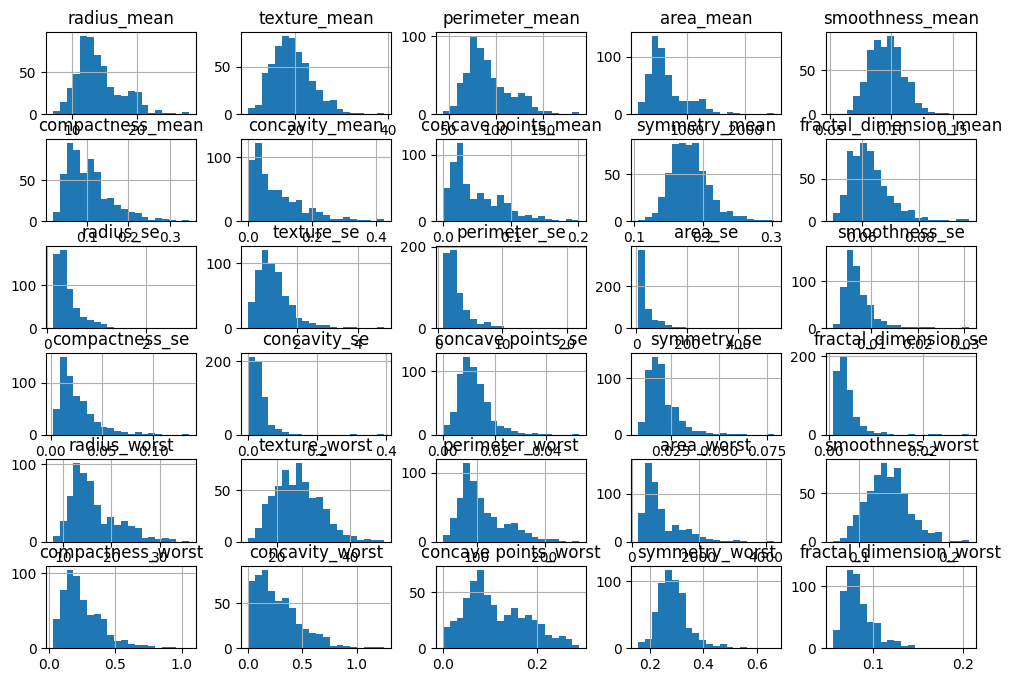

In [9]:
# Mengambil sampel beberapa kolom yang ingin dilihat distribusinya
kolom_distribusi = df[list (df.columns[1:])]
# Melihat distribusi data dengan histogram
kolom_distribusi.hist(bins=20, figsize=(12, 8))  # Anda dapat mengatur jumlah bins sesuai kebutuhan
plt.show()

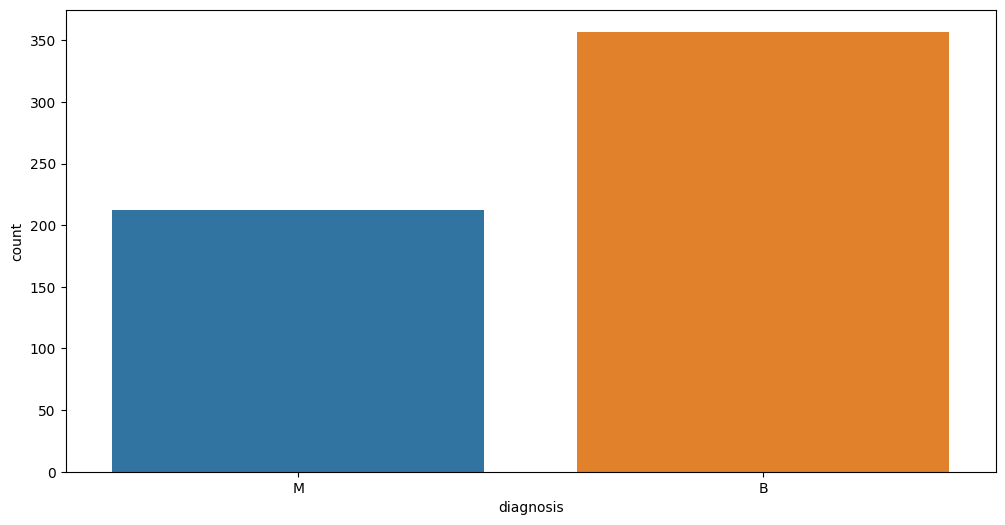

In [10]:
# Menghitung jumlah True)iment untuk tiap kategori

cm = sns.light_palette("green", as_cmap=True)
diagnosis_cat_count = df.groupby('diagnosis')['area_mean'].count().reset_index().sort_values(by = 'area_mean', ascending = False)
diagnosis_cat_count.style.background_gradient(cmap = 'Purples')

plt.figure(figsize = (12, 6))
sns.countplot(x = 'diagnosis', data = df)
plt.show()

### Check Outlier

In [11]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


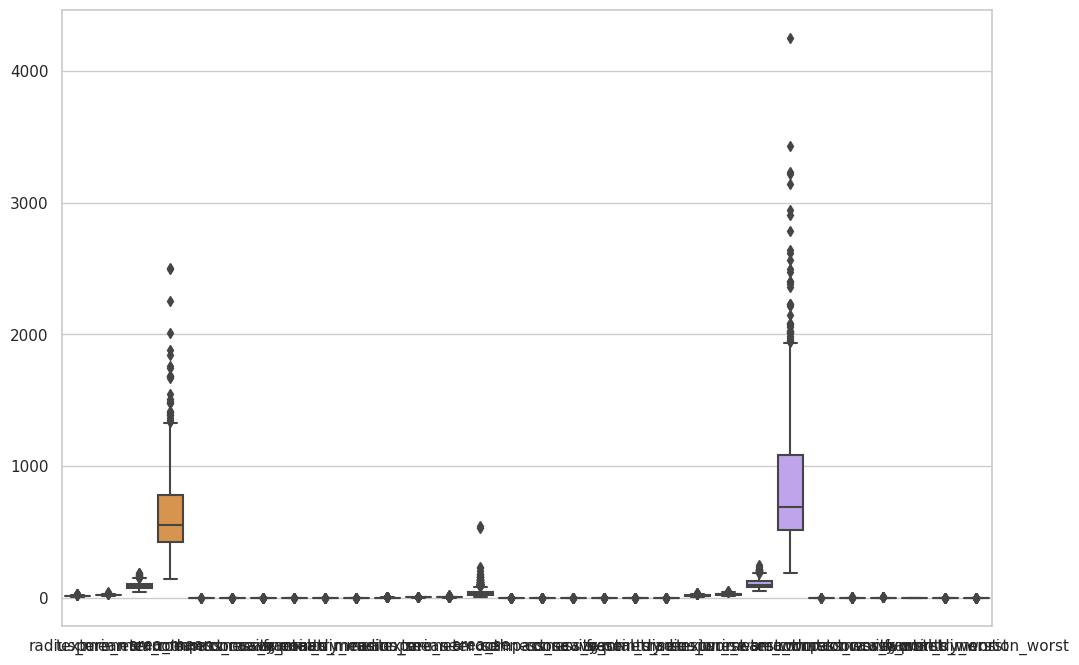

In [12]:
# Mengambil sampel beberapa kolom yang ingin dilihat distribusinya
kolom_distribusi = df[list(df.columns[1:])]

# Membuat displot menggunakan Seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")  # Opsi lain untuk gaya: "darkgrid", "white", "ticks", dll.
sns.boxplot(data=kolom_distribusi)  # Anda dapat mengatur jumlah bins sesuai kebutuhan
plt.show()

In [13]:
def find_outlier(yourlist):
    outlier = ''
    for i in range(len(yourlist)):
        if yourlist[i] > batas_atas:
            outlier += str(yourlist[i]) + ', '
        if yourlist[i] < batas_bawah:
            outlier += str(yourlist[i]) + ', '
    return outlier

for j in df[list(df.columns[1:])] :
    # Q1 = df[j].describe()['25%']
    Q1 = df[j].describe()[4]
    # print (df[j].describe() == 66)

    Q3 = df[j].describe()['75%']
    IQR = Q3 - Q1
    batas_bawah= Q1-(1.5*IQR)
    batas_atas = Q3+(1.5*IQR)
    if find_outlier(df[j]) == '':
        print('Feature {} has no Outlier'.format(j))
    else:
        print('Feature {} has {} Outlier which is:'.format(j, (len(find_outlier(df[j]).split(',')))-1))
        print(find_outlier(df[j]))

Feature radius_mean has 14 Outlier which is:
25.22, 22.27, 24.25, 23.27, 27.22, 23.29, 28.11, 23.21, 23.51, 25.73, 22.01, 27.42, 23.09, 24.63, 
Feature texture_mean has 7 Outlier which is:
32.47, 33.81, 39.28, 33.56, 31.12, 30.72, 30.62, 
Feature perimeter_mean has 13 Outlier which is:
171.5, 152.8, 166.2, 152.1, 182.1, 158.9, 188.5, 153.5, 155.1, 174.2, 186.9, 152.1, 165.5, 
Feature area_mean has 25 Outlier which is:
1404.0, 1878.0, 1509.0, 1761.0, 1686.0, 2250.0, 1685.0, 2499.0, 1670.0, 1364.0, 1419.0, 1491.0, 1747.0, 2010.0, 1546.0, 1482.0, 1386.0, 1335.0, 1407.0, 1384.0, 2501.0, 1682.0, 1841.0, 1347.0, 1479.0, 
Feature smoothness_mean has 6 Outlier which is:
0.1425, 0.1398, 0.1447, 0.1634, 0.1371, 0.05263, 
Feature compactness_mean has 16 Outlier which is:
0.2776, 0.2839, 0.2396, 0.2458, 0.2293, 0.3454, 0.2665, 0.2768, 0.2867, 0.2832, 0.2413, 0.3114, 0.2364, 0.2363, 0.2576, 0.277, 
Feature concavity_mean has 18 Outlier which is:
0.3001, 0.313, 0.3754, 0.3339, 0.4264, 0.3003, 0.4268

In [14]:

def find_outlier(yourlist):
    outliers = [str(x) for x in yourlist if x > batas_atas or x < batas_bawah]
    return ', '.join(outliers)

outlier_data = []

for j in df[list(df.columns[1:])]:
    Q1 = df[j].describe()[4]
    Q3 = df[j].describe()['75%']
    IQR = Q3 - Q1
    batas_bawah = Q1 - (1.5 * IQR)
    batas_atas = Q3 + (1.5 * IQR)
    outliers = find_outlier(df[j])

    status = 'No Outlier' if not outliers else 'Outlier'
    count = len(outliers.split(', ')) if outliers else 0
    outlier_data.append(['Feature', j, status, count, outliers])

outlier_df = pd.DataFrame(outlier_data, columns=['Type', 'Feature', 'Status', 'Count', 'Outliers'])
print(outlier_df)

       Type                  Feature      Status  Count  \
0   Feature              radius_mean     Outlier     14   
1   Feature             texture_mean     Outlier      7   
2   Feature           perimeter_mean     Outlier     13   
3   Feature                area_mean     Outlier     25   
4   Feature          smoothness_mean     Outlier      6   
5   Feature         compactness_mean     Outlier     16   
6   Feature           concavity_mean     Outlier     18   
7   Feature      concave points_mean     Outlier     10   
8   Feature            symmetry_mean     Outlier     15   
9   Feature   fractal_dimension_mean     Outlier     15   
10  Feature                radius_se     Outlier     38   
11  Feature               texture_se     Outlier     20   
12  Feature             perimeter_se     Outlier     38   
13  Feature                  area_se     Outlier     65   
14  Feature            smoothness_se     Outlier     30   
15  Feature           compactness_se     Outlier     28 

In [15]:
outlier_df

,Type,Feature,Status,Count,Outliers
0,Feature,radius_mean,Outlier,14,"25.22, 22.27, 24.25, 23.27, 27.22, 23.29, 28.1..."
1,Feature,texture_mean,Outlier,7,"32.47, 33.81, 39.28, 33.56, 31.12, 30.72, 30.62"
2,Feature,perimeter_mean,Outlier,13,"171.5, 152.8, 166.2, 152.1, 182.1, 158.9, 188...."
3,Feature,area_mean,Outlier,25,"1404.0, 1878.0, 1509.0, 1761.0, 1686.0, 2250.0..."
4,Feature,smoothness_mean,Outlier,6,"0.1425, 0.1398, 0.1447, 0.1634, 0.1371, 0.05263"
5,Feature,compactness_mean,Outlier,16,"0.2776, 0.2839, 0.2396, 0.2458, 0.2293, 0.3454..."
6,Feature,concavity_mean,Outlier,18,"0.3001, 0.313, 0.3754, 0.3339, 0.4264, 0.3003,..."
7,Feature,concave points_mean,Outlier,10,"0.1604, 0.1845, 0.1823, 0.2012, 0.1878, 0.162,..."
8,Feature,symmetry_mean,Outlier,15,"0.2597, 0.2521, 0.304, 0.2743, 0.2906, 0.2556,..."
9,Feature,fractal_dimension_mean,Outlier,15,"0.09744, 0.08243, 0.08046, 0.0898, 0.08142, 0...."


#### handling Outlayer

In [16]:
# Membuat salinan dataset
scaled_df = df.copy()

# Daftar fitur yang akan di-scale
features_to_scale = df.columns[1:]

In [17]:
scaled_df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [18]:
# Melakukan scaling menggunakan RobustScaler
robust_scaler = RobustScaler()
scaled_df[features_to_scale] = robust_scaler.fit_transform(df[features_to_scale])

# Menyimpan hasil scaling RobustScaler ke dalam dataframe baru
robust_df = scaled_df.copy()


In [19]:
robust_df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1.132353,-1.502664,1.263740,1.241446,1.190174,2.824832,2.358711,2.115850,1.855030,...,1.801038,-0.935185,2.105595,2.343063,1.051020,2.364252,1.807750,1.715248,2.635556,1.884578
1,M,1.764706,-0.190053,1.612859,2.138245,-0.587956,-0.213653,0.250742,0.682995,0.059172,...,1.733564,-0.231481,1.480746,2.232284,-0.255102,-0.131839,0.055514,0.892194,-0.106667,0.435500


In [20]:
# Melakukan scaling menggunakan MinMaxScaler
minmax_scaler = MinMaxScaler()
scaled_df[features_to_scale] = minmax_scaler.fit_transform(df[features_to_scale])

# Menyimpan hasil scaling MinMaxScaler ke dalam dataframe baru
minmax_df = scaled_df.copy()

In [21]:
minmax_df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878


In [22]:

# Melakukan scaling menggunakan StandardScaler
standard_scaler = StandardScaler()
scaled_df[features_to_scale] = standard_scaler.fit_transform(df[features_to_scale])

# Menyimpan hasil scaling StandardScaler ke dalam dataframe baru
standard_df = scaled_df.copy()

In [23]:
standard_df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


### Encoding

In [24]:
lE = LabelEncoder()
df['diagnosis'] = lE.fit_transform(df['diagnosis'])

In [25]:
# 1: M
# 0: B
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
df.shape

(569, 31)

### Model Klasifikasi

#### Model KLasifikasi dengan Robust

In [27]:
# Bagi dataset menjadi train dan test (90% - 10%)
X = robust_df[list(robust_df.columns[1:])]
y = robust_df[list(robust_df.columns[0:1])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=789)


In [28]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.132353,-1.502664,1.263740,1.241446,1.190174,2.824832,2.358711,2.115850,1.855030,2.039192,...,1.801038,-0.935185,2.105595,2.343063,1.051020,2.364252,1.807750,1.715248,2.635556,1.884578
1,1.764706,-0.190053,1.612859,2.138245,-0.587956,-0.213653,0.250742,0.682995,0.059172,-0.578385,...,1.733564,-0.231481,1.480746,2.232284,-0.255102,-0.131839,0.055514,0.892194,-0.106667,0.435500
2,1.549020,0.428064,1.512617,1.798841,0.725304,1.027337,1.343287,1.758242,0.819527,-0.184086,...,1.487889,0.013889,1.328167,1.797960,0.445578,1.107869,0.833458,1.483052,1.171852,0.365664
3,-0.477941,0.273535,-0.299343,-0.455298,2.463286,2.921045,1.778327,1.335444,2.381657,4.263658,...,-0.010381,0.126157,0.029305,-0.208897,2.670068,3.410109,1.714605,1.633358,5.653333,4.508244
4,1.696078,-0.799290,1.688904,2.058223,0.234020,0.613470,1.349219,1.318681,0.050296,-0.321853,...,1.309689,-1.011574,1.320901,1.562335,0.207483,-0.035956,0.645678,0.648595,-0.678519,-0.158099


In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(512, 30)
(512, 1)
(57, 30)
(57, 1)


##### Tree

In [30]:
# Define model Decision Tree
tree_model = DecisionTreeClassifier(random_state=789)

# Train model Decision Tree tanpa tuning parameter
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy Decision Tree tanpa tuning parameter:", accuracy_tree)
confusion_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print (confusion_matrix_tree)

Accuracy Decision Tree tanpa tuning parameter: 0.9122807017543859
[[31  1]
 [ 4 21]]


In [31]:

# Tuning parameter Decision Tree dengan Randomized Search CV
param_dist_tree = {'max_depth': [None, 10, 20, 30, 40],
                   'min_samples_split': [2, 5, 10],
                   'min_samples_leaf': [1, 2, 4]}
random_search_tree = RandomizedSearchCV(tree_model, param_distributions=param_dist_tree, n_iter=10, cv=5)
random_search_tree.fit(X_train, y_train)
best_tree_model = random_search_tree.best_estimator_
best_tree_model.fit(X_train, y_train)
y_pred_tree_best = best_tree_model.predict(X_test)
accuracy_tree_best = accuracy_score(y_test, y_pred_tree_best)
print("Accuracy Decision Tree dengan tuning parameter:", accuracy_tree_best)
confusion_matrix_tree_best = confusion_matrix(y_test, y_pred_tree_best)
print (confusion_matrix_tree_best)

Accuracy Decision Tree dengan tuning parameter: 0.8947368421052632
[[30  2]
 [ 4 21]]


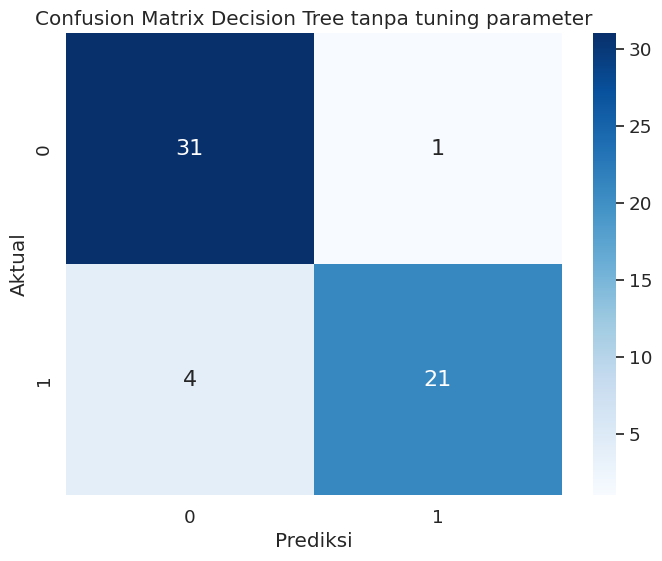

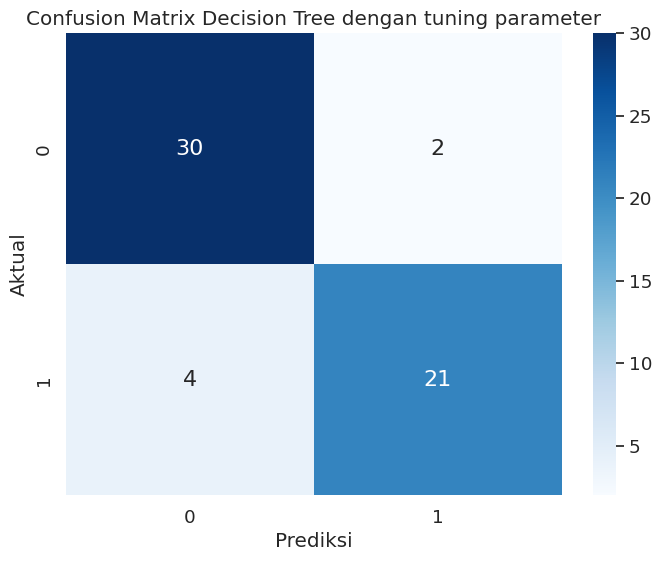

In [32]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_tree, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision Tree tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_tree_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision Tree dengan tuning parameter')
plt.show()

##### KNN

In [33]:
# Define model K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()

# Train model KNN tanpa tuning parameter
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy KNN tanpa tuning parameter:", accuracy_knn)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print (confusion_matrix_knn)

Accuracy KNN tanpa tuning parameter: 0.9649122807017544
[[32  0]
 [ 2 23]]


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [34]:

# Tuning parameter KNN dengan Grid Search CV
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
best_knn_model = grid_search_knn.best_estimator_
best_knn_model.fit(X_train, y_train)
y_pred_knn_best = best_knn_model.predict(X_test)
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)

# Evaluasi hasil untuk model Decision knn dan KNN
print("Accuracy KNN dengan tuning parameter:", accuracy_knn_best)
confusion_matrix_knn_best = confusion_matrix(y_test, y_pred_knn_best)
print (confusion_matrix_knn_best)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Accuracy KNN dengan tuning parameter: 0.9473684210526315
[[32  0]
 [ 3 22]]


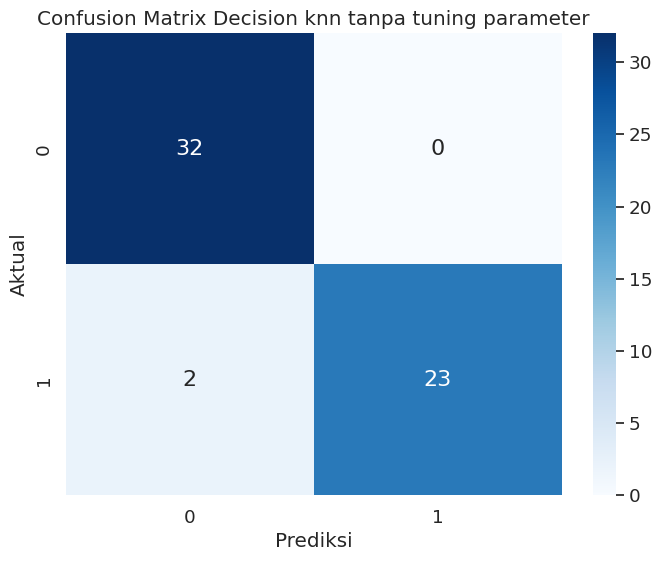

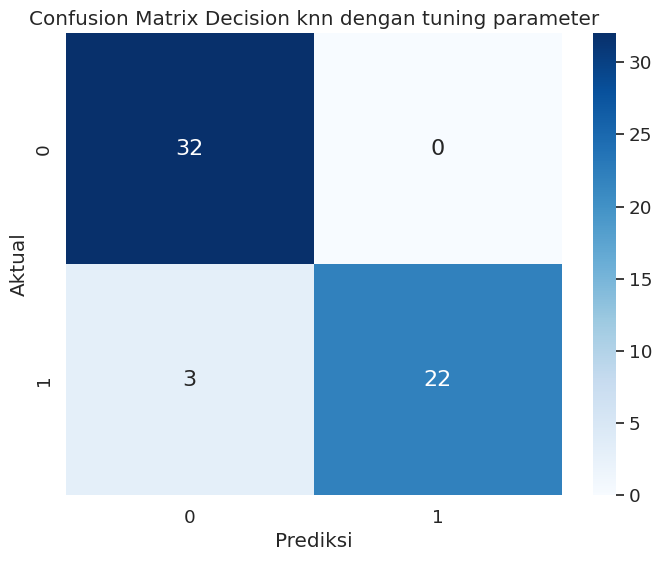

In [41]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_knn, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision knn tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_knn_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision knn dengan tuning parameter')
plt.show()

##### SVM

In [36]:
# Define model SVM
svm_model = SVC(random_state=789)

# Train model SVM tanpa tuning parameter
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy SVM tanpa tuning parameter:", accuracy_svm)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print (confusion_matrix_svm)

Accuracy SVM tanpa tuning parameter: 0.9473684210526315


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
# Tuning parameter SVM dengan Grid Search CV atau Randomized Search CV
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)
best_svm_model = grid_search_svm.best_estimator_
best_svm_model.fit(X_train, y_train)
y_pred_svm_best = best_svm_model.predict(X_test)
accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)

# Evaluasi hasil untuk model SVM
print("Accuracy SVM dengan tuning parameter:", accuracy_svm_best)
confusion_matrix_tree_best = confusion_matrix(y_test, y_pred_tree_best)
print (confusion_matrix_tree_best)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Accuracy SVM dengan tuning parameter: 0.9298245614035088


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


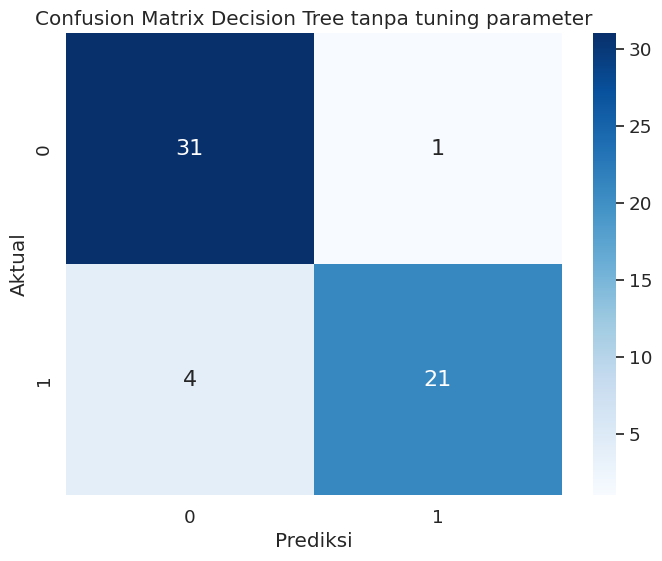

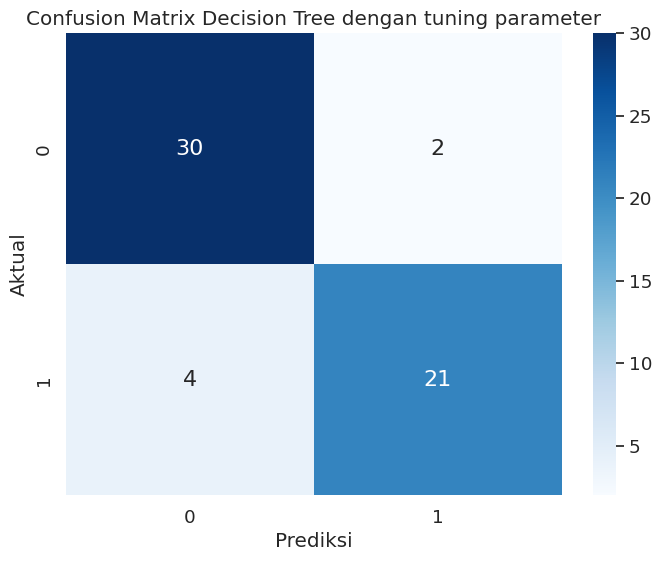

In [38]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_tree, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision Tree tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_tree_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision Tree dengan tuning parameter')
plt.show()

##### Forest

In [39]:
# Define model Random Forest
random_forest_model = RandomForestClassifier(random_state=42)

# Train model Random Forest tanpa tuning parameter
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("Accuracy Random Forest tanpa tuning parameter:", accuracy_random_forest)

<ipython-input-39-c2258fa7b433>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, y_train)


Accuracy Random Forest tanpa tuning parameter: 0.9298245614035088


In [40]:
# Tuning parameter Random Forest dengan Grid Search CV atau Randomized Search CV
param_grid_random_forest = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_random_forest = GridSearchCV(random_forest_model, param_grid_random_forest, cv=5)
grid_search_random_forest.fit(X_train, y_train)
best_random_forest_model = grid_search_random_forest.best_estimator_
best_random_forest_model.fit(X_train, y_train)
y_pred_random_forest_best = best_random_forest_model.predict(X_test)
accuracy_random_forest_best = accuracy_score(y_test, y_pred_random_forest_best)

# Evaluasi hasil untuk model Random Forest
print("Accuracy Random Forest dengan tuning parameter:", accuracy_random_forest_best)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

KeyboardInterrupt: ignored

##### Regresi Logistik

In [ ]:
# Define model Regresi Logistik
logistic_regression_model = LogisticRegression(random_state=789)

# Train model Regresi Logistik tanpa tuning parameter
logistic_regression_model.fit(X_train, y_train)
y_pred_logistic_regression = logistic_regression_model.predict(X_test)
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
print("Accuracy Regresi Logistik tanpa tuning parameter:", accuracy_logistic_regression)

In [ ]:
# Tuning parameter Regresi Logistik dengan Grid Search CV atau Randomized Search CV
param_grid_logistic_regression = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_search_logistic_regression = GridSearchCV(logistic_regression_model, param_grid_logistic_regression, cv=5)
grid_search_logistic_regression.fit(X_train, y_train)
best_logistic_regression_model = grid_search_logistic_regression.best_estimator_
best_logistic_regression_model.fit(X_train, y_train)
y_pred_logistic_regression_best = best_logistic_regression_model.predict(X_test)
accuracy_logistic_regression_best = accuracy_score(y_test, y_pred_logistic_regression_best)

# Evaluasi hasil untuk model Regresi Logistik
print("Accuracy Regresi Logistik dengan tuning parameter:", accuracy_logistic_regression_best)

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_tree, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision Tree tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_tree_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision Tree dengan tuning parameter')
plt.show()